In [1]:
version = "v1.6.092820"

---
# Assignment 2 Part 2: Time Series Similarities (50 pts)

In this assignment, we're going to explore several techniques for measuring similarity between two time series. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1: Load data (5 pts)

We will continue to explore the data we used in Part 1, `assets/time_series_covid19_confirmed_global.csv` from the [Johns Hopkins University CSSE COVID-19 dataset](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series). This time, we are interested in the number of daily new cases **exclusively from the top 5 countries that have the most cumulative cases as of August 21, 2020**. 

Create a function called `load_data` that reads in the csv file and produces a `pd.DataFrame` that looks like: 

| | ? | ? | ? | ? | ? |
|-: | -: | -: | -: | -: | -: |
|**2020-01-23**|0.0|0.0|0.0|0.0|0.0|
|**2020-01-24**|1.0|0.0|0.0|0.0|0.0|
|**2020-01-25**|0.0|0.0|0.0|0.0|0.0|
|**2020-01-26**|3.0|0.0|0.0|0.0|0.0|
|**2020-01-27**|0.0|0.0|0.0|0.0|0.0|
|**...**|...|...|...|...|...|
|**2020-08-17**|35112.0|19373.0|55018.0|4839.0|2541.0|
|**2020-08-18**|44091.0|47784.0|64572.0|4718.0|2258.0|
|**2020-08-19**|47408.0|49298.0|69672.0|4790.0|3916.0|
|**2020-08-20**|44023.0|45323.0|68900.0|4767.0|3880.0|
|**2020-08-21**|48693.0|30355.0|69876.0|4838.0|3398.0|

where
* the index of the DataFrame is a `pd.DatetimeIndex`; 
* the column names "?" are the top 5 countries with the most cumulative cases as of August 21, 2020, sorted in descending order from left to right;
* the values of the DataFrame are daily new cases; and
* the DataFrame doesn't contain any `NaN` values. 


**This function should return a `pd.DataFrame` of shape `(212, 5)`, whose index is a `pd.DatetimeIndex` and whose column labels are the top 5 countries.**

### Testing code:

In [3]:
#Read data:
df = pd.read_csv('assets/time_series_covid19_confirmed_global.csv')

#Melt dataframe for date columns: 
df_melt = pd.melt(df, id_vars=['Province/State','Country/Region','Lat','Long'], var_name='date', value_name='confirmed')

#View melted dataframe
df_melt.head()

,Province/State,Country/Region,Lat,Long,date,confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [4]:
#View datatypes:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56658 entries, 0 to 56657
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  17253 non-null  object 
 1   Country/Region  56658 non-null  object 
 2   Lat             56658 non-null  float64
 3   Long            56658 non-null  float64
 4   date            56658 non-null  object 
 5   confirmed       56658 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 2.6+ MB


In [5]:
#Transform date column in to datetime object: 
df_melt['date'] = pd.to_datetime(df_melt['date'])

In [6]:
df_grouped_country = df_melt[df_melt['date']=='2020-08-21'].groupby(['Country/Region'])['confirmed'].sum().sort_values(ascending = False)[:5]
top_countries = df_grouped_country#.index.tolist()
print(top_countries)

Country/Region
US              5622540
Brazil          3532330
India           2975701
Russia           944671
South Africa     603338
Name: confirmed, dtype: int64


In [7]:
#Now, let's groupby data by country and get a sum of confirmed cases as of Aug 21, 2020: 
df_grouped_country = df_melt[df_melt['date']=='2020-08-21'].groupby(['Country/Region'])['confirmed'].sum().sort_values(ascending = False)[:5]
top_countries = df_grouped_country#.index.tolist()
print(top_countries)


#Now, let's groupby data by date and get a sum of confirmed cases: 
df_grouped_date_us = df_melt[['date','confirmed']][df_melt['Country/Region']=="US"].groupby(['date'])['confirmed'].sum().sort_index(ascending = True)
df_grouped_date_br = df_melt[['date','confirmed']][df_melt['Country/Region']=="Brazil"].groupby(['date'])['confirmed'].sum().sort_index(ascending = True)
df_grouped_date_in = df_melt[['date','confirmed']][df_melt['Country/Region']=="India"].groupby(['date'])['confirmed'].sum().sort_index(ascending = True)
df_grouped_date_ru = df_melt[['date','confirmed']][df_melt['Country/Region']=="Russia"].groupby(['date'])['confirmed'].sum().sort_index(ascending = True)
df_grouped_date_sa = df_melt[['date','confirmed']][df_melt['Country/Region']=="South Africa"].groupby(['date'])['confirmed'].sum().sort_index(ascending = True)


daily_us = []
daily_br = [] 
daily_in = []
daily_ru = []
daily_sa = []

for i in range(1,len(df_grouped_date_us)):
    diff_us = df_grouped_date_us[i]-df_grouped_date_us[i-1]
    daily_us.append(diff_us)
result_us = pd.Series(daily_us, name = 'US', index = df_grouped_date_us.index[1:])

for j in range(1,len(df_grouped_date_br)):
    diff_br = df_grouped_date_br[j]-df_grouped_date_br[j-1]
    daily_br.append(diff_br)
result_br = pd.Series(daily_br, name = 'Brazil', index = df_grouped_date_br.index[1:])

for k in range(1,len(df_grouped_date_in)):
    diff_in = df_grouped_date_in[k]-df_grouped_date_in[k-1]
    daily_in.append(diff_in)
result_in = pd.Series(daily_in, name = 'India', index = df_grouped_date_in.index[1:])


for l in range(1,len(df_grouped_date_ru)):
    diff_ru = df_grouped_date_ru[l]-df_grouped_date_ru[l-1]
    daily_ru.append(diff_ru)
result_ru = pd.Series(daily_ru, name = 'Russia' ,index = df_grouped_date_ru.index[1:])


for m in range(1,len(df_grouped_date_sa)):
    diff_sa = df_grouped_date_sa[m]-df_grouped_date_sa[m-1]
    daily_sa.append(diff_sa)
result_sa = pd.Series(daily_sa, name = 'South Africa', index = df_grouped_date_sa.index[1:])

result = pd.concat([result_us,result_br,result_in,result_ru,result_sa], axis = 1)

Country/Region
US              5622540
Brazil          3532330
India           2975701
Russia           944671
South Africa     603338
Name: confirmed, dtype: int64


In [8]:
#Test Result: 
result

,US,Brazil,India,Russia,South Africa
date,,,,,
2020-01-23,0,0,0,0,0
2020-01-24,1,0,0,0,0
2020-01-25,0,0,0,0,0
2020-01-26,3,0,0,0,0
2020-01-27,0,0,0,0,0
...,...,...,...,...,...
2020-08-17,35112,19373,55018,4839,2541
2020-08-18,44091,47784,64572,4718,2258
2020-08-19,47408,49298,69672,4790,3916


### Implementing Code:

In [9]:
def load_data():
    daily_new_cases = None
    
    # YOUR CODE HERE
    #Read data:
    df = pd.read_csv('assets/time_series_covid19_confirmed_global.csv')

    #Melt dataframe for date columns: 
    df_melt = pd.melt(df, id_vars=['Province/State','Country/Region','Lat','Long'], var_name='date', value_name='confirmed')

    #Transform date column in to datetime object: 
    df_melt['date'] = pd.to_datetime(df_melt['date'])
    
    #Now, let's groupby data by country and get a sum of confirmed cases: 
    df_grouped_country = df_melt.groupby(['Country/Region'])['confirmed'].sum().sort_values(ascending = False)[:5]
    top_countries = df_grouped_country.index.tolist()


    #Now, let's groupby data by country and get a sum of confirmed cases as of Aug 21, 2020: 
    df_grouped_country = df_melt[df_melt['date']=='2020-08-21'].groupby(['Country/Region'])['confirmed'].sum().sort_values(ascending = False)[:5]
    top_countries = df_grouped_country#.index.tolist()
    #print(top_countries)


    #Now, let's groupby data by date and get a sum of confirmed cases: 
    df_grouped_date_us = df_melt[['date','confirmed']][df_melt['Country/Region']=="US"].groupby(['date'])['confirmed'].sum().sort_index(ascending = True)
    df_grouped_date_br = df_melt[['date','confirmed']][df_melt['Country/Region']=="Brazil"].groupby(['date'])['confirmed'].sum().sort_index(ascending = True)
    df_grouped_date_in = df_melt[['date','confirmed']][df_melt['Country/Region']=="India"].groupby(['date'])['confirmed'].sum().sort_index(ascending = True)
    df_grouped_date_ru = df_melt[['date','confirmed']][df_melt['Country/Region']=="Russia"].groupby(['date'])['confirmed'].sum().sort_index(ascending = True)
    df_grouped_date_sa = df_melt[['date','confirmed']][df_melt['Country/Region']=="South Africa"].groupby(['date'])['confirmed'].sum().sort_index(ascending = True)


    daily_us = []
    daily_br = [] 
    daily_in = []
    daily_ru = []
    daily_sa = []

    for i in range(1,len(df_grouped_date_us)):
        diff_us = df_grouped_date_us[i]-df_grouped_date_us[i-1]
        daily_us.append(diff_us)
    result_us = pd.Series(daily_us, name = 'US', index = df_grouped_date_us.index[1:])

    for j in range(1,len(df_grouped_date_br)):
        diff_br = df_grouped_date_br[j]-df_grouped_date_br[j-1]
        daily_br.append(diff_br)
    result_br = pd.Series(daily_br, name = 'Brazil', index = df_grouped_date_br.index[1:])

    for k in range(1,len(df_grouped_date_in)):
        diff_in = df_grouped_date_in[k]-df_grouped_date_in[k-1]
        daily_in.append(diff_in)
    result_in = pd.Series(daily_in, name = 'India', index = df_grouped_date_in.index[1:])


    for l in range(1,len(df_grouped_date_ru)):
        diff_ru = df_grouped_date_ru[l]-df_grouped_date_ru[l-1]
        daily_ru.append(diff_ru)
    result_ru = pd.Series(daily_ru, name = 'Russia' ,index = df_grouped_date_ru.index[1:])


    for m in range(1,len(df_grouped_date_sa)):
        diff_sa = df_grouped_date_sa[m]-df_grouped_date_sa[m-1]
        daily_sa.append(diff_sa)
    result_sa = pd.Series(daily_sa, name = 'South Africa', index = df_grouped_date_sa.index[1:])
    
    daily_new_cases = pd.concat([result_us,result_br,result_in,result_ru,result_sa], axis = 1)
    return daily_new_cases
    raise NotImplementedError()
    

In [10]:
#load_data()

In [11]:
# Autograder tests

stu_ans = load_data()

assert isinstance(stu_ans, pd.DataFrame), "Q1: Your function should return a pd.DataFrame. "
assert stu_ans.shape == (212, 5), "Q1: The shape of your pd.DataFrame returned is incorrect. "
assert isinstance(stu_ans.index, pd.DatetimeIndex), "Q1: The index of your pd.DataFrame must be a pd.DatetimeIndex. "
assert (("2020-01-23" <= stu_ans.index) & (stu_ans.index <= "2020-08-21")).all(), "Q1: The index of your pd.DataFrame contains an incorrect time range. "
assert not stu_ans.isna().any(axis=None), "Q1: Your pd.DataFrame contains NaN values. "

# Some hidden tests


del stu_ans

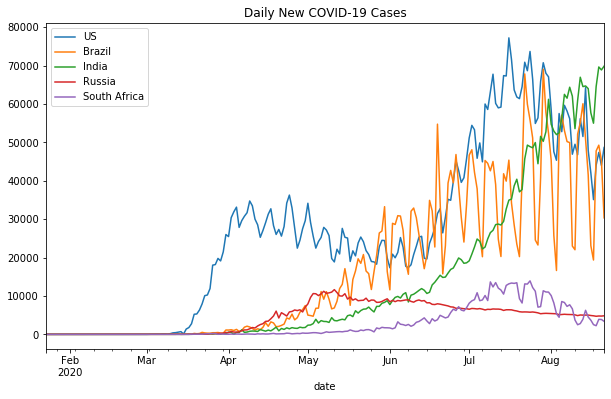

In [12]:
# Let's plot and see the time series
axes = load_data().plot(figsize=(10, 6), title="Daily New COVID-19 Cases", label="# Cases")

del axes

## Question 2: Extract Seasonal Components (5 pts)

Recall from the lectures that an additive Seasonal Decomposition decomposes a time series into the following components:

\begin{equation*}
Y(t) = T(t) + S(t) + R(t)
\end{equation*}

where $T(t)$ represents trends, $S(t)$ represents seasonal patterns and $R(t)$ represents residuals. In the rest of the assignment, we will work with the seasonal component $S(t)$ to understand the similarities among the seasonal patterns of the five time series we have, so let's write a function that extracts this very seasonal component. 

Complete the function below that accepts a `pd.DataFrame` and returns another `pd.DataFrame` of the same shape that looks like:

| | ? | ? | ? | ? | ? |
|-: | -: | -: | -: | -: | -: |
|**2020-01-23**|2431.761670|3380.626554|441.179428|-54.886371|322.986535|
|**2020-01-24**|3446.796153|3457.641332|621.396176|23.689984|362.434811|
|**2020-01-25**|578.564626|586.665963|594.066127|55.034811|391.346141|
|**2020-01-26**|-2728.454422|-6031.950950|46.655454|137.908703|76.880131|
|**2020-01-27**|-3293.854422|-7144.674760|-1234.673118|1.842036|-507.496059|
|**...**|...|...|...|...|...|
|**2020-08-17**|-3293.854422|-7144.674760|-1234.673118|1.842036|-507.496059|
|**2020-08-18**|-719.521088|1549.577621|-544.749308|-28.929392|-662.877011|
|**2020-08-19**|284.707483|4202.114239|76.125240|-134.659770|16.725452|
|**2020-08-20**|2431.761670|3380.626554|441.179428|-54.886371|322.986535|
|**2020-08-21**|3446.796153|3457.641332|621.396176|23.689984|362.434811|

where
* the index of the DataFrame is a `pd.DatetimeIndex`; 
* the column names "?" are the top 5 countries with the most cumulative cases as of August 21, 2020, sorted in descending order from left to right;
* the values of the DataFrame are the seasonal components $S(t)$ as returned by the `seasonal_decompose` function from `statsmodels`; and
* the DataFrame doesn't contain any `NaN` values. 


**This function should return a `pd.DataFrame` of shape `(len(df), 5)`, whose index is a `pd.DatetimeIndex` and whose column labels are the top 5 countries.**

### Testing Code: 

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
#See first Series: 
load_data().iloc[:,0]

date
2020-01-23        0
2020-01-24        1
2020-01-25        0
2020-01-26        3
2020-01-27        0
              ...  
2020-08-17    35112
2020-08-18    44091
2020-08-19    47408
2020-08-20    44023
2020-08-21    48693
Name: US, Length: 212, dtype: int64

In [15]:
#Obtain Seasonal Pattern of single series:
decompose = seasonal_decompose(load_data().iloc[:,0])
seas = decompose.seasonal.dropna()
seas

date
2020-01-23    2431.761670
2020-01-24    3446.796153
2020-01-25     578.564626
2020-01-26   -2728.454422
2020-01-27   -3293.854422
                 ...     
2020-08-17   -3293.854422
2020-08-18    -719.521088
2020-08-19     284.707483
2020-08-20    2431.761670
2020-08-21    3446.796153
Name: seasonal, Length: 212, dtype: float64

In [16]:
#Obtain seasonal pattern for all 5 series:  
seasonal= {}
for i in range(0,5):
    seas = seasonal_decompose(load_data().iloc[:,i])
    seasonal[i]= seas.seasonal.dropna()
    res = pd.DataFrame(seasonal)

res.columns = ['US', 'Brazil', 'India', 'Russia', 'South Africa']


In [17]:
#Test Result: 
res

,US,Brazil,India,Russia,South Africa
date,,,,,
2020-01-23,2431.761670,3380.626554,441.179428,-54.886371,322.986535
2020-01-24,3446.796153,3457.641332,621.396176,23.689984,362.434811
2020-01-25,578.564626,586.665963,594.066127,55.034811,391.346141
2020-01-26,-2728.454422,-6031.950950,46.655454,137.908703,76.880131
2020-01-27,-3293.854422,-7144.674760,-1234.673118,1.842036,-507.496059
...,...,...,...,...,...
2020-08-17,-3293.854422,-7144.674760,-1234.673118,1.842036,-507.496059
2020-08-18,-719.521088,1549.577621,-544.749308,-28.929392,-662.877011
2020-08-19,284.707483,4202.114239,76.125240,-134.659770,16.725452


### Implementing Code: 

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

def sea_decomp(df, model="additive"):
    """
    Takes in a DataFrame and extracts the seasonal components
    """
    sea_df = None
    
    # YOUR CODE HERE
    #Obtain seasonal pattern for all 5 series:  
    seasonal= {}
    for i in range(0,5):
        seas = seasonal_decompose(df.iloc[:,i], model="additive")
        seasonal[i]= seas.seasonal.dropna()
        sea_df = pd.DataFrame(seasonal)

    sea_df.columns = ['US', 'Brazil', 'India', 'Russia', 'South Africa']
    return sea_df
    raise NotImplementedError()
    


In [19]:
# Autograder tests

stu_df = load_data()
stu_ans = sea_decomp(stu_df, "additive")

assert isinstance(stu_ans, pd.DataFrame), "Q2: Your function should return a pd.DataFrame. "
assert stu_ans.shape == (len(stu_df), 5), "Q2: The shape of your pd.DataFrame returned is incorrect. "
assert isinstance(stu_ans.index, pd.DatetimeIndex), "Q2: The index of your pd.DataFrame must be a pd.DatetimeIndex. "
assert (("2020-01-23" <= stu_ans.index) & (stu_ans.index <= "2020-08-21")).all(), "Q2: The index of your pd.DataFrame contains an incorrect time range. "
assert not stu_ans.isna().any(axis=None), "Q2: Your pd.DataFrame contains NaN values. "

# Some hidden tests


del stu_df, stu_ans

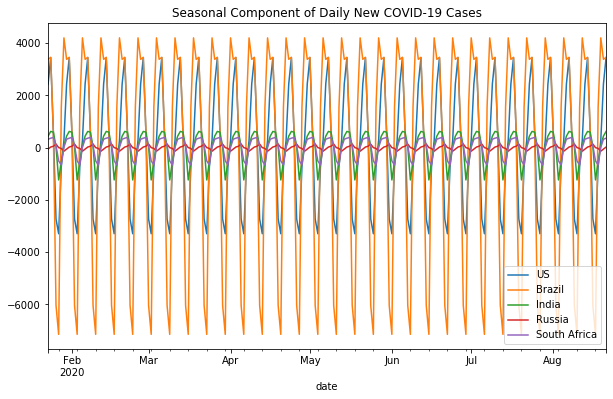

In [20]:
# Let's plot and see the seasonal components

df = load_data()
axes = sea_decomp(df).plot(figsize=(10, 6), title="Seasonal Component of Daily New COVID-19 Cases")

del df, axes

## Question 3: Calculate Euclidean Distance (10 pts)

Now, we may start to ask questions like, "which country in the top 5 countries are the most similar to Country A in terms of seasonal patterns?". In addition to the seasonal components that reflect seasonal patterns, we also need a measure of similarity between two time series in order to answer questions like this. One of such measures is the good old Euclidean Distance. 

Recall that the Euclidean Distance between two vectors $x$ and $y$ is the length of the vector $x - y$:

\begin{equation*}
\mathrm{EucDist}(x, y) = \left\lVert x - y \right\rVert_{2} = \sqrt{\left(x - y\right)^{T}\left(x - y\right)} = \sqrt{\sum_{i = 1}^{n}\left(x_{i} - y_{i}\right)^{2}}
\end{equation*}

Complete the function below that accepts a `pd.DataFrame`, whose columns are time series for each country, and that returns all pairwise Euclidean Distance among these time series, similar to the following:

| | ? | ? | ? | ? | ? |
|-: | -: | -: | -: | -: | -: |
|**?**|0.000000|233760.757213||||
|**?**|233760.757213|0.000000||||
|**?**|||0.000000|||
|**?**||||0.000000||
|**?**|||||0.000000|

where
* the index and the column names "?" are the top 5 countries with the most cumulative cases as of August 21, 2020, sorted in descending order from top to bottom and from left to right; and
* the values of the DataFrame are pairwise Euclidean Distance, for example, `233760.757213` is the Euclidean Distance between the time series of the Rank 1 country and the Rank 2 country

**This function should return a `pd.DataFrame` of shape `(5, 5)`, whose index and column labels are the top 5 countries.**

### Testing code: 

In [21]:
#First we need index and column names in descending order and left to right as of Aug 21, 2020;
columns_names = top_countries.index.tolist()
top_index = top_countries.index

In [22]:
#So, empty dataframe is going to look like this:
result_df = pd.DataFrame(index = top_index, columns = columns_names)
result_df

,US,Brazil,India,Russia,South Africa
Country/Region,,,,,
US,NaN,NaN,NaN,NaN,NaN
Brazil,NaN,NaN,NaN,NaN,NaN
India,NaN,NaN,NaN,NaN,NaN
Russia,NaN,NaN,NaN,NaN,NaN
South Africa,NaN,NaN,NaN,NaN,NaN


In [23]:
#Now, we need to fill paiwise euclidean distance for result_df as per above: 
#Let's write a function that can help us caluclate pairwise euclidean distance

In [24]:
#Initiate empty dataframe:
result_df = pd.DataFrame(index = top_index, columns = columns_names)
#Let's create array for each series
us = load_data().iloc[:,0].values
br = load_data().iloc[:,1].values
ind= load_data().iloc[:,2].values
ru = load_data().iloc[:,3].values
sa = load_data().iloc[:,4].values

#Create empty list for each country:
usa= []
brazil = []
india = []
russia = []
south_africa = []

#Create a function to calculate euclidean distance:
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum((vector1-vector2)**2))

#Iterate over lst to caluclate pairwise euclidean distance: 
lst = [us,br,ind,ru,sa]
for i in lst: 
    usa.append(euclidean_distance(us,i))
    brazil.append(euclidean_distance(br,i))
    india.append(euclidean_distance(ind,i))
    russia.append(euclidean_distance(ru,i))
    south_africa.append(euclidean_distance(sa,i))

#Fill result_df:     
result_df.iloc[:,0] = usa
result_df.iloc[:,1] = brazil
result_df.iloc[:,2] = india
result_df.iloc[:,3] = russia
result_df.iloc[:,4] = south_africa


#As an alternative, we can also build above matric by building a dataframe from scratch:
#alternative_df = pd.DataFrame({'US': usa, 'Brazil': brazil, 'Inda': india, 'Russia': russia, 'South Africa': south_africa}, index = top_countries.index)

#This seems to match with the result



In [25]:
#Test Result
result_df

,US,Brazil,India,Russia,South Africa
Country/Region,,,,,
US,0.000000,233760.757213,272344.138927,433638.331574,436238.175972
Brazil,233760.757213,0.000000,178779.663740,306032.283923,304919.698741
India,272344.138927,178779.663740,0.000000,316862.767630,303936.538967
Russia,433638.331574,306032.283923,316862.767630,0.000000,67392.593681
South Africa,436238.175972,304919.698741,303936.538967,67392.593681,0.000000


### Implementing Code:

In [26]:
def calc_euclidean_dist(df):
    """
    Takes in a DataFrame and computes all pairwise Euclidean Distance
    """
    euclidean_dist_df = None
    
    # YOUR CODE HERE
    #Initiate empty dataframe:
    result_df = pd.DataFrame(index = top_index, columns = columns_names)
    #Let's create array for each series
    us = df.iloc[:,0].values
    br = df.iloc[:,1].values
    ind= df.iloc[:,2].values
    ru = df.iloc[:,3].values
    sa = df.iloc[:,4].values

    #Create empty list for each country:
    usa= []
    brazil = []
    india = []
    russia = []
    south_africa = []

    #Create a function to calculate euclidean distance:
    def euclidean_distance(vector1, vector2):
        return np.sqrt(np.sum((vector1-vector2)**2))

    #Iterate over lst to caluclate pairwise euclidean distance: 
    lst = [us,br,ind,ru,sa]
    for i in lst: 
        usa.append(euclidean_distance(us,i))
        brazil.append(euclidean_distance(br,i))
        india.append(euclidean_distance(ind,i))
        russia.append(euclidean_distance(ru,i))
        south_africa.append(euclidean_distance(sa,i))

    #Fill result_df:     
    result_df.iloc[:,0] = usa
    result_df.iloc[:,1] = brazil
    result_df.iloc[:,2] = india
    result_df.iloc[:,3] = russia
    result_df.iloc[:,4] = south_africa
    return result_df
    raise NotImplementedError()
    
    #return euclidean_dist_df

In [27]:
#result_df

In [28]:
# Autograder tests

stu_df = load_data()
stu_ans = calc_euclidean_dist(stu_df)

assert isinstance(stu_ans, pd.DataFrame), "Q3: Your function should return a pd.DataFrame. "
assert stu_ans.shape == (5, 5), "Q3: The shape of your pd.DataFrame is not correct. "
assert (stu_ans.index == stu_ans.columns).all(), "Q3: Your pd.DataFrame should have the same index and column labels. "

# Some hidden tests


del stu_df, stu_ans

Now let's calculate the pairwise Euclidean Distance between seasonal patterns. What can you say about the similarities among these seasonal patterns? 

In [29]:
# Let's show the pairwise Euclidean Distance matrix

df = load_data()
calc_euclidean_dist(sea_decomp(df))

,US,Brazil,India,Russia,South Africa
Country/Region,,,,,
US,0.000000,37616.752035,27032.887714,33986.305519,30084.544171
Brazil,37616.752035,0.000000,57583.437987,63663.896821,60839.376478
India,27032.887714,57583.437987,0.000000,9102.412727,4490.020448
Russia,33986.305519,63663.896821,9102.412727,0.000000,5658.222387
South Africa,30084.544171,60839.376478,4490.020448,5658.222387,0.000000


In [30]:
#When we compare seasonality, euclidean distance between US and India is 27,032 while South Africa and India is 4,490. 
#South Africa has more closely matched seasonality pattern with India than US. 
#But, could this change, would be interesting to study as we try out other distance measures..  

## Question 4: Calculate Cosine Similarity (10 pts)

Another commonly used similarity measure is the Cosine Similarity. Recall that the Cosine Similarity between two vectors $x$ and $y$ is the cosine of the angle between $x$ and $y$:

\begin{equation*}
\mathrm{CosSim}(x, y) = \frac{x^{T}y}{\left\lVert x \right\rVert_{2} \left\lVert y \right\rVert_{2}} = \left(\frac{x}{\left\lVert x \right\rVert_{2}}\right)^{T}\left(\frac{y}{\left\lVert y \right\rVert_{2}}\right)
\end{equation*}

Complete the function below that accepts a `pd.DataFrame`, whose columns are the time series for each country, and that returns all pairwise Cosine Similarity among these time series, similar to the following:

| | ? | ? | ? | ? | ? |
|-: | -: | -: | -: | -: | -: |
|**?**|1.000000	|0.898664||||
|**?**|0.898664|1.000000||||
|**?**|||1.000000|||
|**?**||||1.000000||
|**?**|||||1.000000|

where
* the index and the column names "?" are the top 5 countries with the most cumulative cases as of August 21, 2020, sorted in descending order from top to bottom and from left to right; and
* the values of the DataFrame are pairwise Cosine Similarity, for example, `0.898664` is the Cosine Similarity between the time series of the Rank 1 country and the Rank 2 country

**This function should return a `pd.DataFrame` of shape `(5, 5)`, whose index and column labels are the top 5 countries.**

### Testing code: 

In [31]:
#First we need index and column names in descending order and left to right as of Aug 21, 2020: Same as Part3
columns_names = top_countries.index.tolist()
top_index = top_countries.index

In [32]:
#So, empty dataframe is going to look like this: Same as Part 3
result_df = pd.DataFrame(index = top_index, columns = columns_names)
result_df

,US,Brazil,India,Russia,South Africa
Country/Region,,,,,
US,NaN,NaN,NaN,NaN,NaN
Brazil,NaN,NaN,NaN,NaN,NaN
India,NaN,NaN,NaN,NaN,NaN
Russia,NaN,NaN,NaN,NaN,NaN
South Africa,NaN,NaN,NaN,NaN,NaN


In [33]:
#Initiate empty dataframe:
result_df_cos = pd.DataFrame(index = top_index, columns = columns_names)
#Let's create array for each series
us = load_data().iloc[:,0].values
br = load_data().iloc[:,1].values
ind= load_data().iloc[:,2].values
ru = load_data().iloc[:,3].values
sa = load_data().iloc[:,4].values

#Create empty list for each country:
usa= []
brazil = []
india = []
russia = []
south_africa = []

#Create a function to calculate cosine similarity:
def cosine_similarity(vec_x, vec_y):
    return np.dot(vec_x, vec_y)/(np.linalg.norm(vec_x) * np.linalg.norm(vec_y))

#Iterate over lst to caluclate cosine similarity: 
lst = [us,br,ind,ru,sa]
for i in lst: 
    usa.append(cosine_similarity(us,i).round(6))
    brazil.append(cosine_similarity(br,i).round(6))
    india.append(cosine_similarity(ind,i).round(6))
    russia.append(cosine_similarity(ru,i).round(6))
    south_africa.append(cosine_similarity(sa,i).round(6))

#Fill result_df:     
result_df_cos.iloc[:,0] = usa
result_df_cos.iloc[:,1] = brazil
result_df_cos.iloc[:,2] = india
result_df_cos.iloc[:,3] = russia
result_df_cos.iloc[:,4] = south_africa


#This seems to match with the result:

In [34]:
#Test Result:
result_df_cos

,US,Brazil,India,Russia,South Africa
Country/Region,,,,,
US,1.000000,0.898664,0.847160,0.804740,0.884909
Brazil,0.898664,1.000000,0.878452,0.763523,0.871214
India,0.847160,0.878452,1.000000,0.590388,0.809944
Russia,0.804740,0.763523,0.590388,1.000000,0.638246
South Africa,0.884909,0.871214,0.809944,0.638246,1.000000


### Implementing Code: 

In [35]:
def calc_cos_sim(df):
    """
    Takes in a DataFrame and computes all pairwise Cosine Similarity
    """
    cos_sim_df = None
    
    # YOUR CODE HERE
    #Initiate empty dataframe:
    result_df_cos = pd.DataFrame(index = top_index, columns = columns_names)
    #Let's create array for each series
    us = df.iloc[:,0].values
    br = df.iloc[:,1].values
    ind= df.iloc[:,2].values
    ru = df.iloc[:,3].values
    sa = df.iloc[:,4].values

    #Create empty list for each country:
    usa= []
    brazil = []
    india = []
    russia = []
    south_africa = []

    #Create a function to calculate cosine similarity:
    def cosine_similarity(vec_x, vec_y):
        return np.dot(vec_x, vec_y)/(np.linalg.norm(vec_x) * np.linalg.norm(vec_y))

    #Iterate over lst to caluclate cosine similarity: 
    lst = [us,br,ind,ru,sa]
    for i in lst: 
        usa.append(cosine_similarity(us,i).round(6))
        brazil.append(cosine_similarity(br,i).round(6))
        india.append(cosine_similarity(ind,i).round(6))
        russia.append(cosine_similarity(ru,i).round(6))
        south_africa.append(cosine_similarity(sa,i).round(6))

    #Fill result_df:     
    result_df_cos.iloc[:,0] = usa
    result_df_cos.iloc[:,1] = brazil
    result_df_cos.iloc[:,2] = india
    result_df_cos.iloc[:,3] = russia
    result_df_cos.iloc[:,4] = south_africa
    return result_df_cos
    raise NotImplementedError()
    
    #return cos_sim_df

In [36]:
#calc_cos_sim(df)

In [37]:
# Autograder tests

stu_df = load_data()
stu_ans = calc_cos_sim(stu_df)

assert isinstance(stu_ans, pd.DataFrame), "Q4: Your function should return a pd.DataFrame. "
assert stu_ans.shape == (5, 5), "Q4: The shape of your pd.DataFrame is not correct. "
assert (stu_ans.index == stu_ans.columns).all(), "Q4: Your pd.DataFrame should have the same index and column labels. "

# Some hidden tests


del stu_df, stu_ans

Now let's calculate the pairwise Cosine Similarity between seasonal patterns. What can you say about the similarities among these seasonal patterns? 

In [38]:
# Let's show the pairwise Cosine Similarity matrix

df = load_data()
calc_cos_sim(sea_decomp(df))

,US,Brazil,India,Russia,South Africa
Country/Region,,,,,
US,1.000000,0.868859,0.783851,-0.325065,0.664261
Brazil,0.868859,1.000000,0.632741,-0.629987,0.403198
India,0.783851,0.632741,1.000000,0.092292,0.917529
Russia,-0.325065,-0.629987,0.092292,1.000000,0.174437
South Africa,0.664261,0.403198,0.917529,0.174437,1.000000


In [39]:
#Compared to Euclidean distance, cosine similarity shows seasonality in US more similar to Brazil than India.
#and both Euclidean and cosine suggests close seasonality between India and South Africa. 

## Question 5: Calculate Dynamic Time Warping (DTW) Cost (20 pts)

Last but not least, the cost of aligning two time series can also be used as a similarity measure. Two time series are more similar if it incurs less cost to align them. One of the commonly used alignment costs is the Dynamic Time Warping (DTW) cost, which we will explore in this problem. 

### Question 5a (10 pts)

Recall from the lectures that the DTW cost is defined by the following recursive relations:

\begin{align}
&\mathrm{DTW}(1, 1)  = d(x_{1}, y_{1}) \\
&\mathrm{DTW}(i, j)  = d(x_{i}, y_{j}) + \min \begin{cases}
\mathrm{DTW}(i, j - 1) & \text{Repeat } x_{i} \\
\mathrm{DTW}(i - 1, j) & \text{Repeat } y_{j} \\
\mathrm{DTW}(i - 1, j - 1) & \text{Both proceed}
\end{cases}
\end{align}

where we define $d(x_{i}, y_{j}) = (x_{i} - y_{j})^{2}$ as in the lectures. With reference to the demo of the DTW algorithm in the lecture slides, implement the function below that computes the DTW cost for two time series. **We don't take the square root of the results just yet, until later when we compare the DTW costs with the Euclidean Distance.**

**This function should EITHER return a `np.ndarray` of shape `(len(y), len(x))` which represents the DTW cost matrix, OR a single `float` that represents the overall DTW cost, depending whether the parameter `ret_matrix=True`.**

### Testing code: 
Steps:
1. I have used pseudo code as per below to write the same in Python.
2. Then used ret_matrix =True or False condition to get cost matrix or single float number.

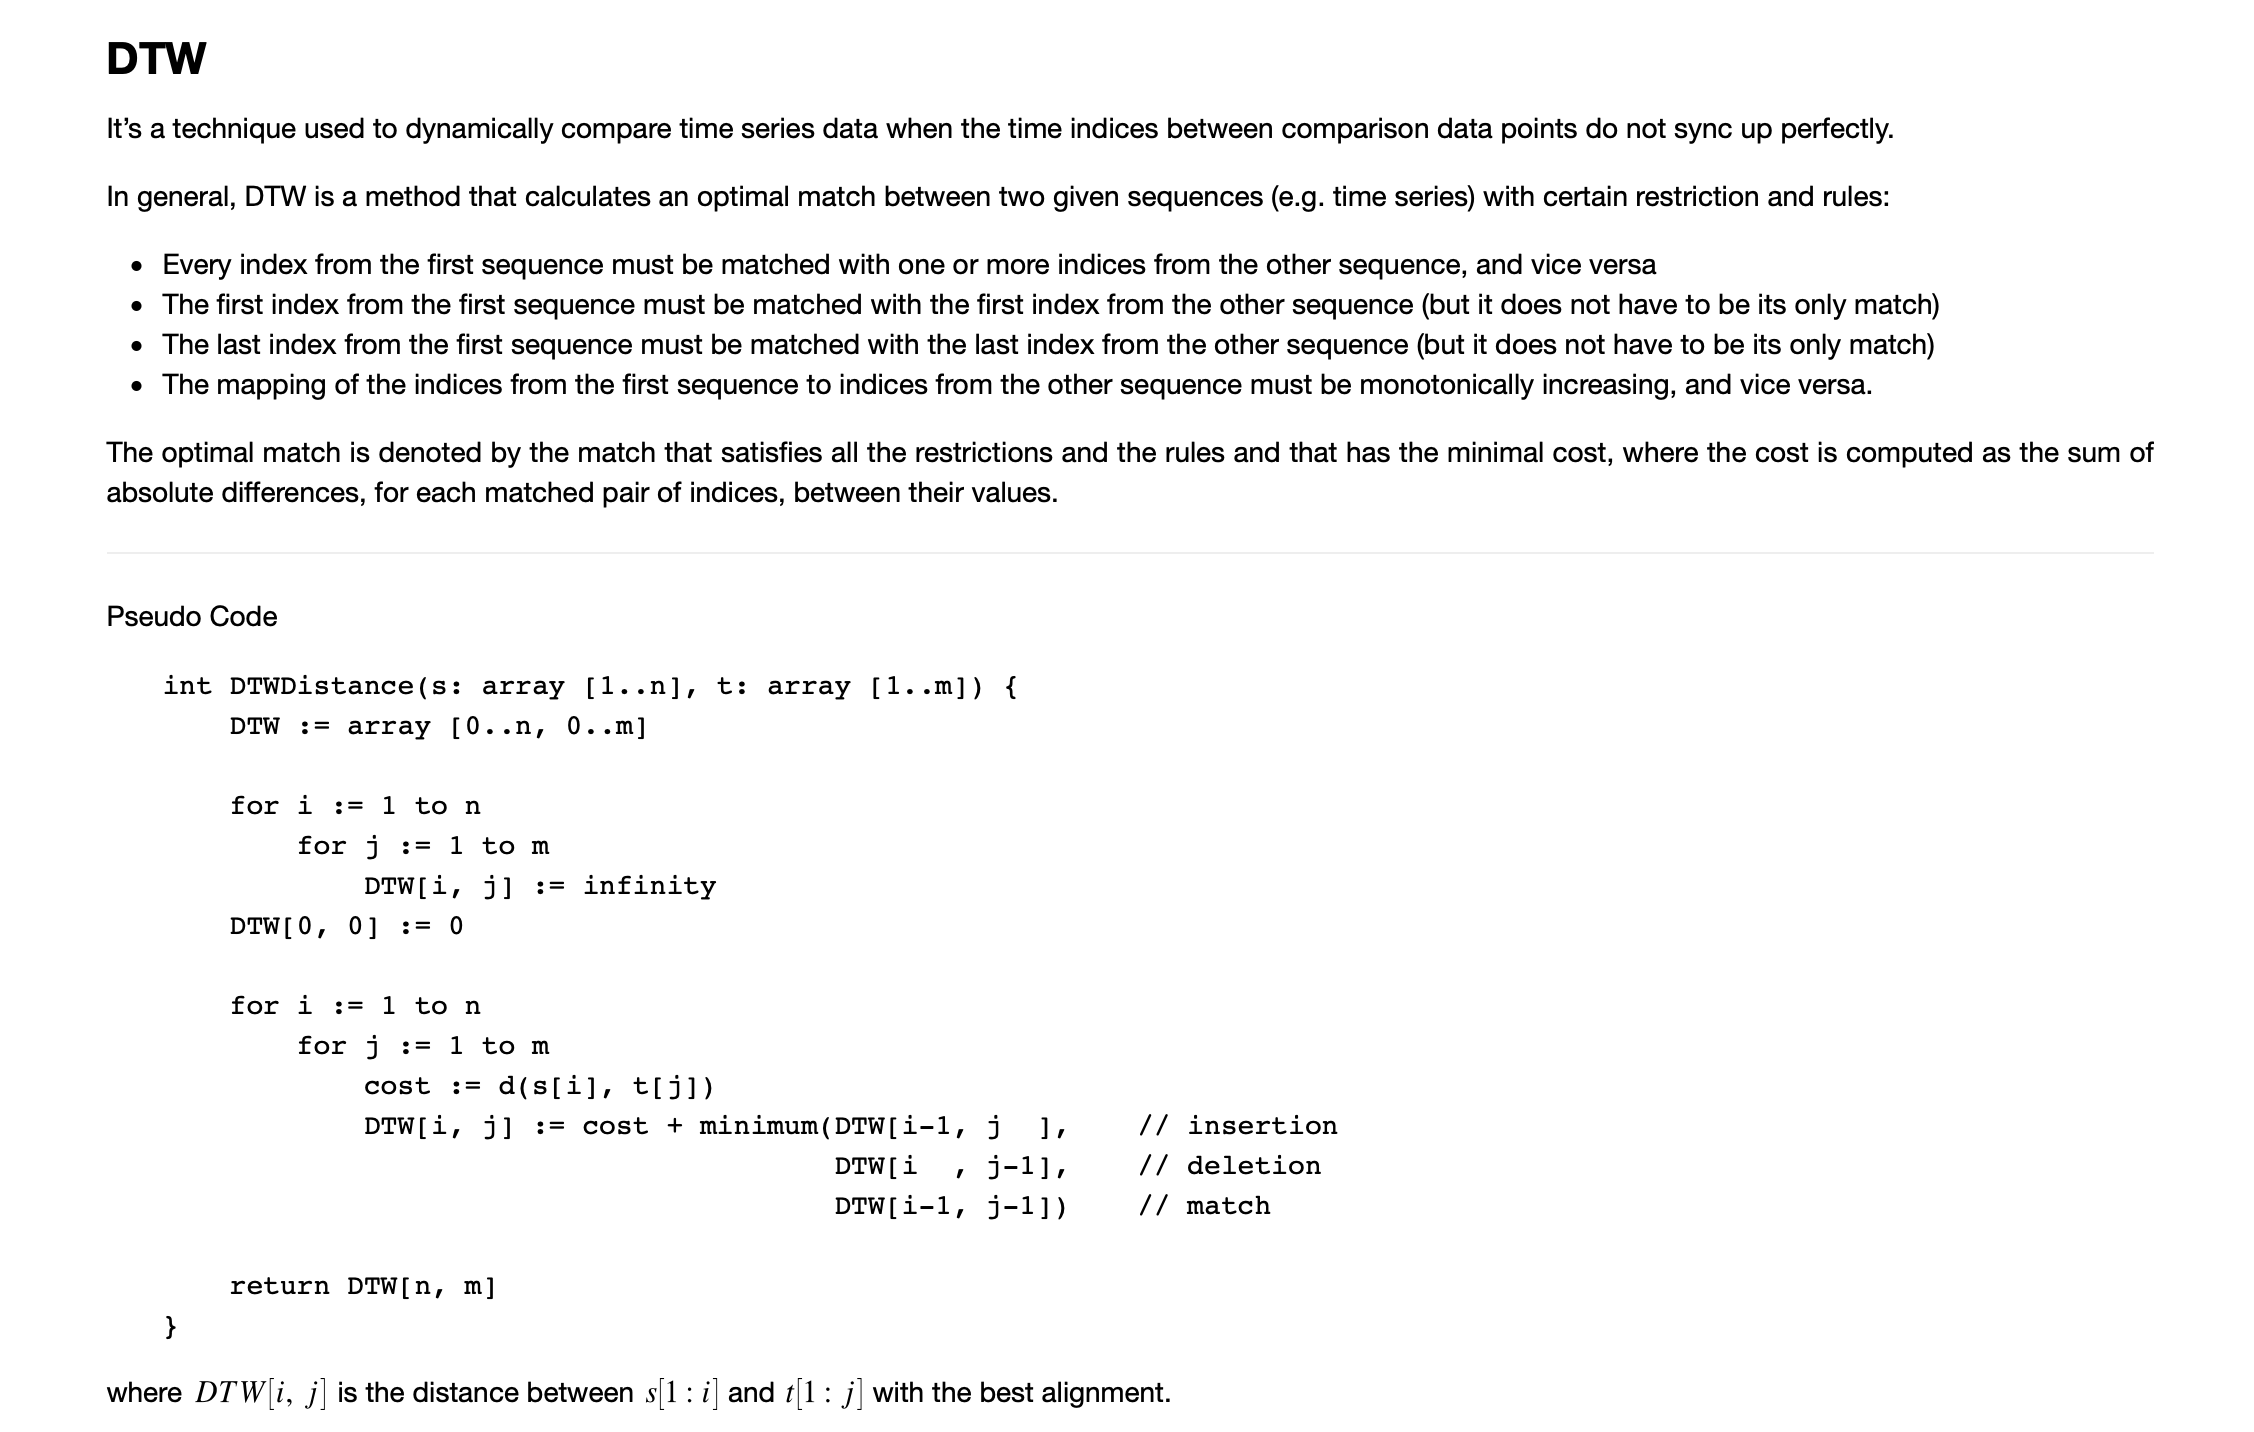

In [40]:
#Let's write all the series here first:
us = df.iloc[:,0].values
br = df.iloc[:,1].values
ind= df.iloc[:,2].values
ru = df.iloc[:,3].values
sa = df.iloc[:,4].values

In [41]:
def calc_pairwise_dtw_cost_test(x,y, ret_matrix= False):
    #For part a, let's select US and Brazil as our first 2 series:  
    #x = us
    #y = br 

    #Length of Matrix x and y;
    n = len(x)
    m = len(y)

    #Define Cost Matrix: 
    dtw_mat = np.zeros((n+1, m+1))

    #Iterate over index values of matrix x and y: 
    for i in range(n+1):
        for j in range(m+1):
            dtw_mat[i,j] = np.inf
    dtw_mat[0,0] = 0

    #Calculate cost and last minimum, where cost = (x-y)**2 for [i,j]:    
    for i in range(1,n+1):
        for j in range(1,m+1):
            cost = (x[i-1]-y[j-1])**2
            last_min = np.min([dtw_mat[i-1,j], dtw_mat[i,j-1], dtw_mat[i-1,j-1]])
            dtw_mat[i,j] = cost + last_min
            result_false = dtw_mat[i,j]
            result_true = dtw_mat[1:,1:] 
    
    if ret_matrix==False:
        return result_false 
  
    if ret_matrix==True:
        return result_true

        

In [42]:
#Test Result:
calc_pairwise_dtw_cost_test(us,br, ret_matrix=False)

9575974038.0

In [43]:
#Test Result:
calc_pairwise_dtw_cost_test(us,br, ret_matrix=True).shape

(212, 212)

### Implementing Code:

In [44]:
import math

def calc_pairwise_dtw_cost(x, y, ret_matrix=False):
    """
    Takes in two series. If ret_matrix=True, returns the full DTW cost matrix; 
    otherwise, returns only the overall DTW cost
    """
    
    #cost_matrix = np.zeros((len(y), len(x)))
    dtw_cost = None
    
    #dist_fn = lambda a, b: (a - b) ** 2  # Optional helper function 
    
    # YOUR CODE HERE
    #Length of Matrix x and y;
    n = len(x)
    m = len(y)

    #Define Cost Matrix: 
    dtw_mat = np.zeros((n+1, m+1))

    #Iterate over index values of matrix x and y: 
    for i in range(n+1):
        for j in range(m+1):
            dtw_mat[i,j] = np.inf
    dtw_mat[0,0] = 0

    #Calculate cost and last minimum, where cost = (x-y)**2 for [i,j]:    
    for i in range(1,n+1):
        for j in range(1,m+1):
            cost = (x[i-1]-y[j-1])**2
            last_min = np.min([dtw_mat[i-1,j], dtw_mat[i,j-1], dtw_mat[i-1,j-1]])
            dtw_mat[i,j] = cost + last_min
            result_false = dtw_mat[i,j]
            result_true = dtw_mat[1:,1:] 
    
    if ret_matrix==False:
        return result_false 
  
    if ret_matrix==True:
        return result_true
        raise NotImplementedError()
    
    #return cost_matrix if ret_matrix else dtw_cost

In [45]:
#calc_pairwise_dtw_cost(us, br, ret_matrix=False)
#calc_pairwise_dtw_cost(us, br, ret_matrix=True).shape

In [46]:
# Autograder tests

stu_df = load_data()

# First test with ret_matrix=False
stu_ans = calc_pairwise_dtw_cost(stu_df.iloc[:, 0], stu_df.iloc[:, 1], ret_matrix=False)
assert isinstance(stu_ans, float), "Q5a: Your function should return a float with ret_matrix=False. "

# Then test with ret_matrix=True
stu_ans = calc_pairwise_dtw_cost(stu_df.iloc[:, 0], stu_df.iloc[:, 1], ret_matrix=True)
assert isinstance(stu_ans, np.ndarray), "Q5a: Your function should return a np.ndarray with ret_matrix=True. "
assert stu_ans.shape == (len(stu_df), len(stu_df)), "Q5a: The shape of your np.ndarray is not correct. "

# Some hidden tests


del stu_df, stu_ans

### Question 5b (10 pts)

Now let's compute all pairwise DTW costs for our five time series. Complete the function below that accepts a `pd.DataFrame`, whose columns are the time series for each country, and that returns all pairwise DTW costs among these time series, similar to the following:

| | ? | ? | ? | ? | ? |
|-: | -: | -: | -: | -: | -: |
|**?**|0.000000e+00		|9.575974e+09||||
|**?**|9.575974e+09|0.000000e+00	||||
|**?**|||0.000000e+00	|||
|**?**||||0.000000e+00	||
|**?**|||||0.000000e+00	|

where
* the index and the column names "?" are the top 5 countries with the most cumulative cases as of August 21, 2020, sorted in descending order from top to bottom and from left to right; and
* the values of the DataFrame are pairwise DTW costs, for example, `9.575974e+09` is the DTW cost between the time series of the Rank 1 country and the Rank 2 country

**This function should return a `pd.DataFrame` of shape `(5, 5)`, whose index and column labels are the top 5 countries.**

### Testing Code:
Steps: 

1. Here, I have used ret_matrix= False, to get single float number for various time series pairs by country. 
2. I used the same idea as before to build (5,5) dataframe with top 5 countries in index and column.

In [47]:
#Initiate empty dataframe:
result_df_dtw_false = pd.DataFrame(index = top_index, columns = columns_names)
#Let's create array for each series
us = load_data().iloc[:,0].values
br = load_data().iloc[:,1].values
ind= load_data().iloc[:,2].values
ru = load_data().iloc[:,3].values
sa = load_data().iloc[:,4].values

#Create empty list for each country:
usa= []
brazil = []
india = []
russia = []
south_africa = []


#Iterate over lst to caluclate pairwise euclidean distance: 
lst = [us,br,ind,ru,sa]
for i in lst: 
    usa.append(calc_pairwise_dtw_cost(us,i))
    brazil.append(calc_pairwise_dtw_cost(br,i))
    india.append(calc_pairwise_dtw_cost(ind,i))
    russia.append(calc_pairwise_dtw_cost(ru,i))
    south_africa.append(calc_pairwise_dtw_cost(sa,i))

#Fill result_df_dtw:     
result_df_dtw_false.iloc[:,0] = usa
result_df_dtw_false.iloc[:,1] = brazil
result_df_dtw_false.iloc[:,2] = india
result_df_dtw_false.iloc[:,3] = russia
result_df_dtw_false.iloc[:,4] = south_africa

In [48]:
#Test Result: 
result_df_dtw_false

,US,Brazil,India,Russia,South Africa
Country/Region,,,,,
US,0.000000e+00,9.575974e+09,5.187397e+09,1.740747e+11,1.395159e+11
Brazil,9.575974e+09,0.000000e+00,1.430988e+10,8.361811e+10,6.542703e+10
India,5.187397e+09,1.430988e+10,0.000000e+00,9.927626e+10,8.728950e+10
Russia,1.740747e+11,8.361811e+10,9.927626e+10,0.000000e+00,1.638671e+08
South Africa,1.395159e+11,6.542703e+10,8.728950e+10,1.638671e+08,0.000000e+00


### Implementing Code: 

In [49]:
def calc_dtw_cost(df):
    """
    Takes in a DataFrame and computes all pairwise DTW costs
    """
    
    dtw_cost_df = None
    
    # YOUR CODE HERE
    #Initiate empty dataframe:
    result_df_dtw_false = pd.DataFrame(index = top_index, columns = columns_names)
    #Let's create array for each series
    us = df.iloc[:,0].values
    br = df.iloc[:,1].values
    ind= df.iloc[:,2].values
    ru = df.iloc[:,3].values
    sa = df.iloc[:,4].values

    #Create empty list for each country:
    usa= []
    brazil = []
    india = []
    russia = []
    south_africa = []

    #Iterate over lst to caluclate pairwise euclidean distance: 
    lst = [us,br,ind,ru,sa]
    for i in lst: 
        usa.append(calc_pairwise_dtw_cost(us,i))
        brazil.append(calc_pairwise_dtw_cost(br,i))
        india.append(calc_pairwise_dtw_cost(ind,i))
        russia.append(calc_pairwise_dtw_cost(ru,i))
        south_africa.append(calc_pairwise_dtw_cost(sa,i))

    #Fill result_df_dtw:     
    result_df_dtw_false.iloc[:,0] = usa
    result_df_dtw_false.iloc[:,1] = brazil
    result_df_dtw_false.iloc[:,2] = india
    result_df_dtw_false.iloc[:,3] = russia
    result_df_dtw_false.iloc[:,4] = south_africa
    return result_df_dtw_false
    
    raise NotImplementedError()
    
    #return dtw_cost_df

In [50]:
#calc_dtw_cost(df)

In [51]:
# Autograder tests - takes some time

stu_df = load_data()
stu_ans = calc_dtw_cost(stu_df)

assert isinstance(stu_ans, pd.DataFrame), "Q5b: Your function should return a pd.DataFrame. "
assert stu_ans.shape == (5, 5), "Q5b: The shape of your pd.DataFrame is not correct. "
assert (stu_ans.index == stu_ans.columns).all(), "Q5b: Your pd.DataFrame should have the same index and column labels. "

# Some hidden tests


del stu_df, stu_ans

Now let's calculate the pairwise DTW costs between seasonal patterns. **Take the sqaure root so that we can compare it with the Euclidean Distance**. What can you say about the similarities among these seasonal patterns? 

In [52]:
# Let's show the pairwise DTW costs matrix

df = load_data()
np.sqrt(calc_dtw_cost(sea_decomp(df)))

,US,Brazil,India,Russia,South Africa
Country/Region,,,,,
US,0.000000,31878.178988,23565.948799,32327.414867,28016.515162
Brazil,31878.178988,0.000000,53400.789074,61868.013722,57143.198022
India,23565.948799,53400.789074,0.000000,7687.627537,4463.425362
Russia,32327.414867,61868.013722,7687.627537,0.000000,4259.096369
South Africa,28016.515162,57143.198022,4463.425362,4259.096369,0.000000


In [53]:
# Here I noticed that seasonality pattern of US matches closely with India and India matching with South Arica. 
#This was quite interesting to compare it with the eudlidean and cosine seasonality patterns, we have seen above. 